# Red Card dataset

### Contains data for red cards recieved by players and there interactions with the referees. 
### The dataset is part of a crowdstorming projects of analyzing if dark skin toned players recieve more red cards compared to light skin toned players. 

### link : https://docs.google.com/document/d/1uCF5wmbcL90qvrk_J27fWAvDcDNrO9o_APkicwRkOKc/edit

### The features and what they represent is shown in the table below.

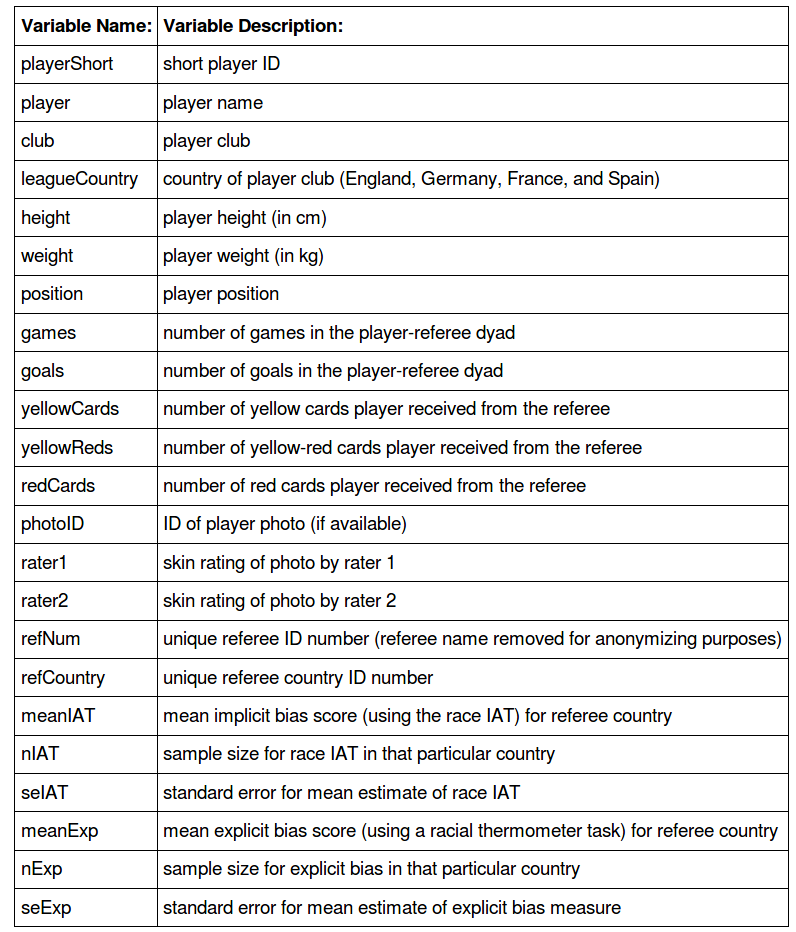


# Loading dependencies and data

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


data = pd.read_csv('redcard.csv')

data.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [42]:
# Shape of the dataset

data.shape

(146028, 28)

In [43]:
# Lets check dtypes using info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146028 entries, 0 to 146027
Data columns (total 28 columns):
playerShort      146028 non-null object
player           146028 non-null object
club             146028 non-null object
leagueCountry    146028 non-null object
birthday         146028 non-null object
height           145765 non-null float64
weight           143785 non-null float64
position         128302 non-null object
games            146028 non-null int64
victories        146028 non-null int64
ties             146028 non-null int64
defeats          146028 non-null int64
goals            146028 non-null int64
yellowCards      146028 non-null int64
yellowReds       146028 non-null int64
redCards         146028 non-null int64
photoID          124621 non-null object
rater1           124621 non-null float64
rater2           124621 non-null float64
refNum           146028 non-null int64
refCountry       146028 non-null int64
Alpha_3          146027 non-null object
meanIAT        

In [44]:
# Exploring missing values

def missing_percentage(df):
    
    """
    returns a new dataframe showing the percentage of missing values
    for each column in the original data provided
   
    """
    
    
    total = df.isnull().sum().sort_values(ascending = False)

    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    return missing_data



#Exploring percentage of missing values 

missing_df = missing_percentage(data)
missing_df.head(10)

# Not a whole lot of missing values. 

,Total,Percent
rater2,21407,14.659517
rater1,21407,14.659517
photoID,21407,14.659517
position,17726,12.138768
weight,2243,1.536007
height,263,0.180102
nIAT,163,0.111622
meanIAT,163,0.111622
seIAT,163,0.111622
meanExp,163,0.111622


# EDA 

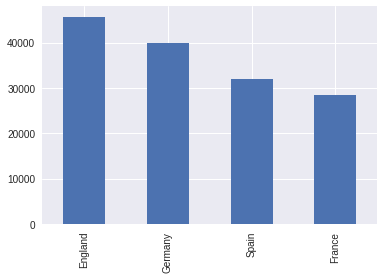

In [45]:
# Lets get an overview of where the players are from, what teams, what positions, etc?

# Country -  The Top 4 leagues are represented in the dataset. 

data['leagueCountry'].value_counts().plot(kind = 'bar')

In [46]:
# Teams 

print("Total unique number of clubs: {}".format(data['club'].nunique()))
print("Top 5 represented clubs with there counts: ")
data['club'].value_counts().head()


Total unique number of clubs: 118
Top 5 represented clubs with there counts: 


Fulham FC              2865
VfL Wolfsburg          2834
Paris Saint-Germain    2803
Bayern München         2792
FC Barcelona           2762
Name: club, dtype: int64

In [64]:
# How many players?

print("Unique number of players: {}".format(data['player'].nunique()))
print("Player with the most records : {}".format(data['player'].value_counts().head(1)))

# Further inspecting reveals there are 3 juanfrans in the dataset.
# Labeled juanfran, juanfran_2 and juanfran_4 

data.loc[data['player'] == ' Juanfran', 'playerShort'].unique()

Unique number of players: 2034
Player with the most records :  Juanfran    276
Name: player, dtype: int64


array(['juanfran', 'juanfran_2', 'juanfran_4'], dtype=object)

In [68]:
# A few of the player names have a space in the start. 

print("# of Players with spaces at start of there names: {}".format(data['player'].str.startswith(" ").sum()))

# Lets remove the spaces
data['player'] = data['player'].str.lstrip()

print("# of Players with spaces at start of there names: {}".format(data['player'].str.startswith(" ").sum()))

# of Players with spaces at start of there names: 29056
# of Players with spaces at start of there names: 0


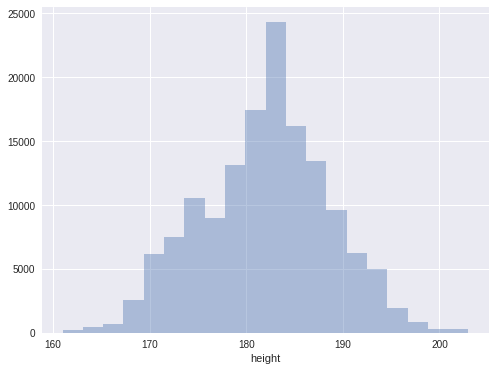

In [79]:
# Moving forward. 
# Lets check how the heights of players vary in our dataset.
# As expected, a normal looking distribution.

plt.figure(figsize=(8,6))
sns.distplot(data['height'].dropna(),bins=20, kde=False)

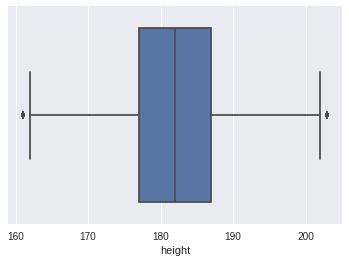

In [80]:
#Tells the same story as the above distplot.
# Nothing new as heights tend to be normally distributed.

sns.boxplot(data['height'])

In [92]:
# For funs sake, who is the tallest and who is the shortest

print("Tallest player: ")
data.loc[data['height'].idxmax(), ['player', 'club', 'position','height']]

Tallest player: 


player      Costel Pantilimon
club          Manchester City
position           Goalkeeper
height                    203
Name: 497, dtype: object

In [93]:
print("Shortest player: ")
data.loc[data['height'].idxmin(), ['player', 'club', 'position','height']]

Shortest player: 


player          Diego Buonanotte
club                   Málaga CF
position    Attacking Midfielder
height                       161
Name: 350, dtype: object

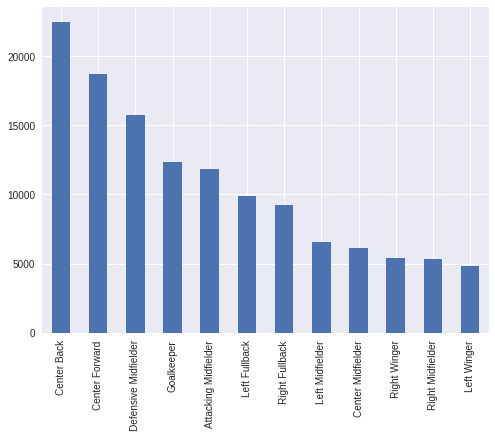

In [98]:
# Lets skip weight and move to position. 

plt.figure(figsize=(8,6))
data['position'].value_counts().plot(kind='bar')

#As expected, defenders are the one getting the most stick from the referees.
#I am just a little surprised to see conter forwards at second place.
#A little googling on top dirtiest players (dirty equating to most fouls), i seem convinced. 

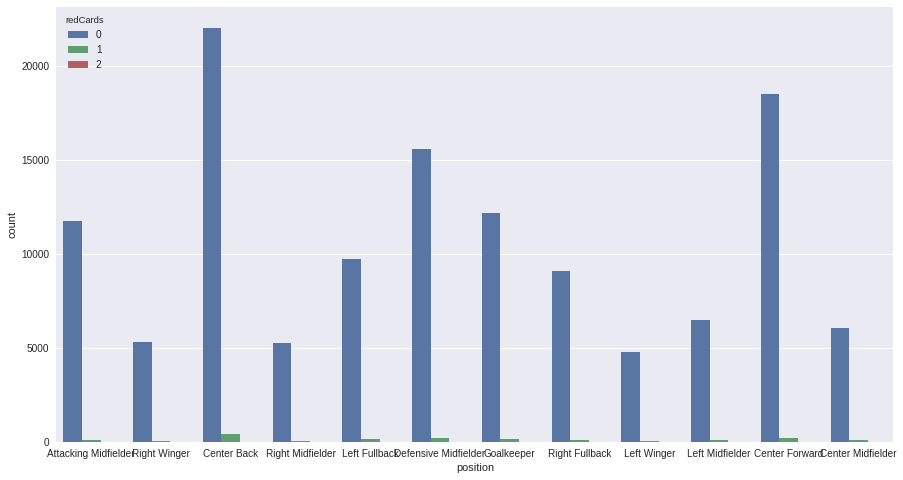

In [134]:
# Checking how the positions of players influence a straight red.
# The 0 peaks are over shadowing the 1's and 2's. 

plt.figure(figsize=(15,8))
sns.countplot(data['position'], hue = data['redCards'])

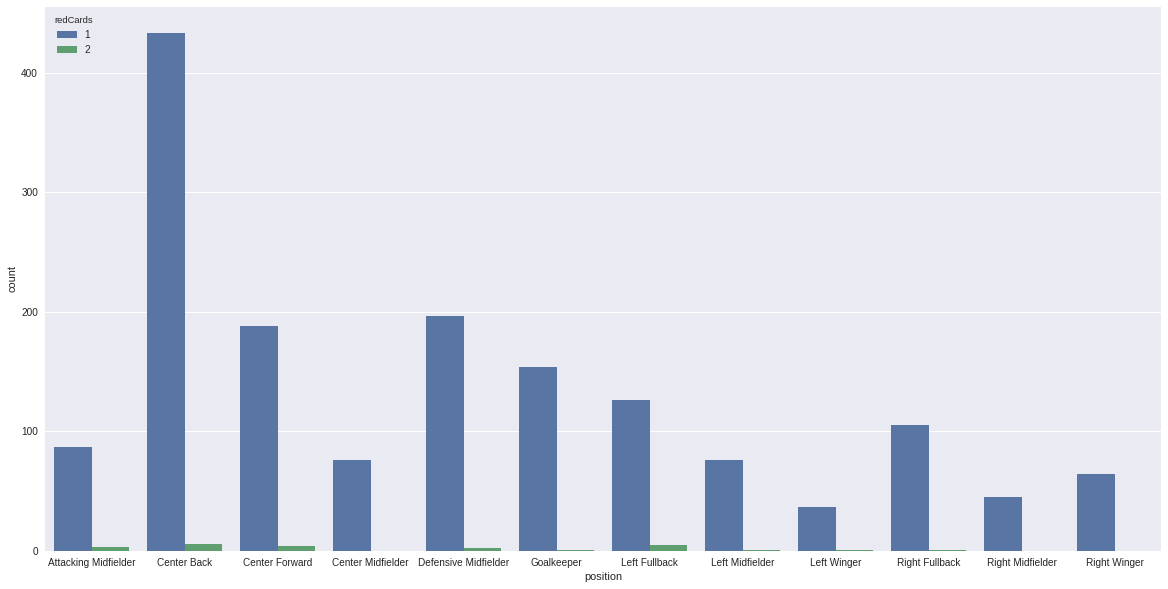

In [147]:
# To make the above plot a little better.
# We subset out dataset and include rows that have more than 1 red card (straight)
# The reason for subsetting is to plot it. 
red_1or2 = data[data['redCards'] != 0][['redCards', 'position']].sort_values(by='position')


fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(red_1or2['position'], hue=red_1or2['redCards'])


#### Center backs lead the way for most straight red cards. Defensive mildfielders and center forwards recieve half the amount of straight REDcards as a center back does.

#### A few of this bunch have also recieved 2 straight reds in there career. Similar figures of center back, center forward in this trend. With the addition of left fullbacks who have also recieved 2 straight reds in there career.
#### Btw, the goalkeepers seem to be catching up in the count of straight reds. This is explainable. Usually goalies end up getting a straight red due to a rash challenge they do on a stricker inside the box. 

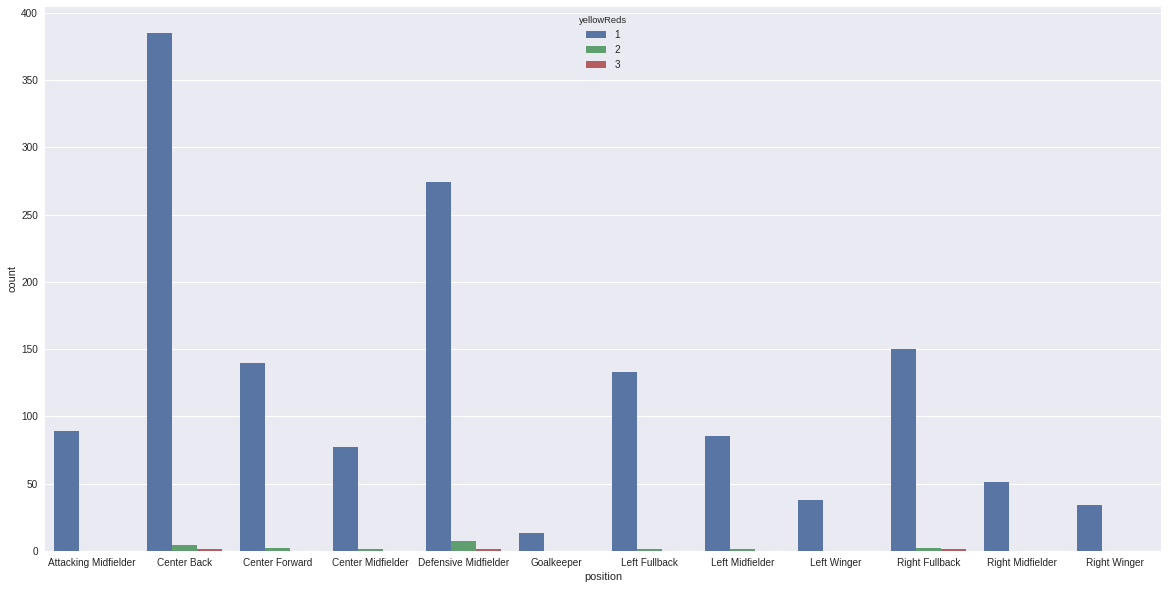

In [146]:
yr_1or2 = data[data['yellowReds'] != 0][['yellowReds', 'position']].sort_values(by='position')


fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(yr_1or2['position'], hue=yr_1or2['yellowReds'])

#### Very similar figures to the straight red plot. 
#### A few things to notice:
##### 1. Majority of the peaks are defensive positions in this one. 
##### 2. The goalkeeper position has fewer values compared to straight red. 
##### 3. Only the defensive positions show any values for 2 and 3 yellow-red cards. 

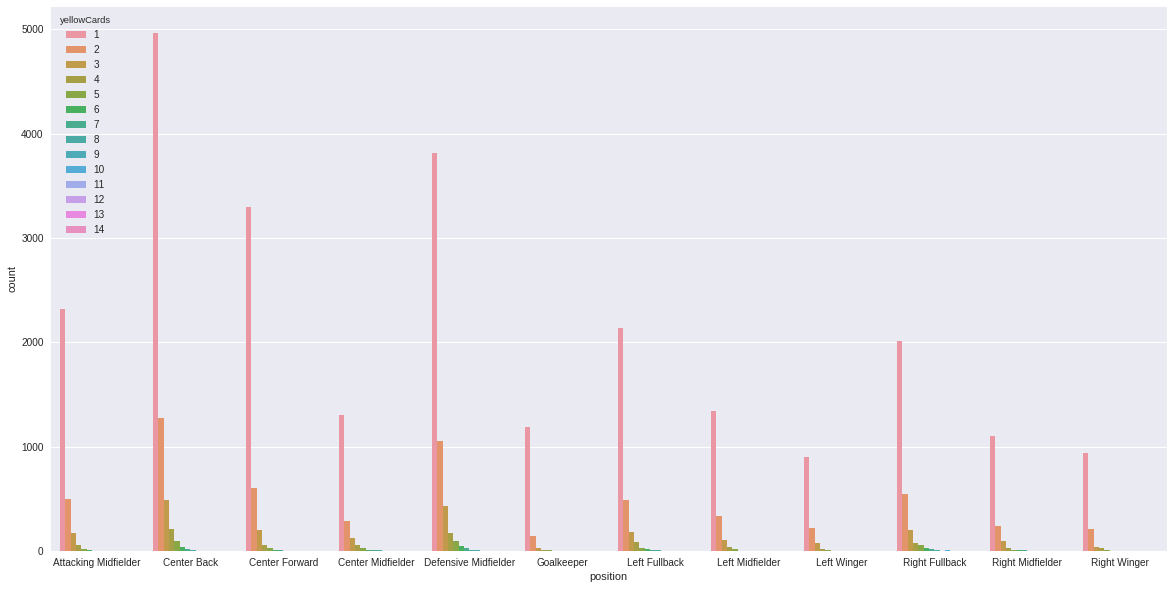

In [148]:
# Checking only yellow cards.

yellow_1or2 = data[data['yellowCards'] != 0][['yellowCards', 'position']].sort_values(by='position')


fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(yellow_1or2['position'], hue=yellow_1or2['yellowCards'])

# A very hard to interpret plot indeed.

In [162]:
# Lets improvise.
# We have 14 categories in yellowcards. Hence there are people who have recieved 14 cards (just 1)
# We either remove these values. Or we create a new value.


data['yellowCards'].value_counts().sort_index()

0     106865
1      28740
2       6562
3       2284
4        884
5        390
6        158
7         86
8         33
9         13
10         8
11         2
12         1
13         1
14         1
Name: yellowCards, dtype: int64

In [170]:
# We replace values greater than 5 by a 5+ which reduces the number of categories we have.
# I know this is not the best way to replace values here. 
# I will use a regular expression to do this later. Which will be a one liner using str.replace(regex). 

data['yellowCards'] = data['yellowCards'].astype(str)

replace_values = {'6':'5+', '7':'5+', '8':'5+', '9':'5+', '10':'5+', '11':'5+',
                 '12':'5+', '13':'5+', '14':'5+'}

data = data.replace({'yellowCards':replace_values})


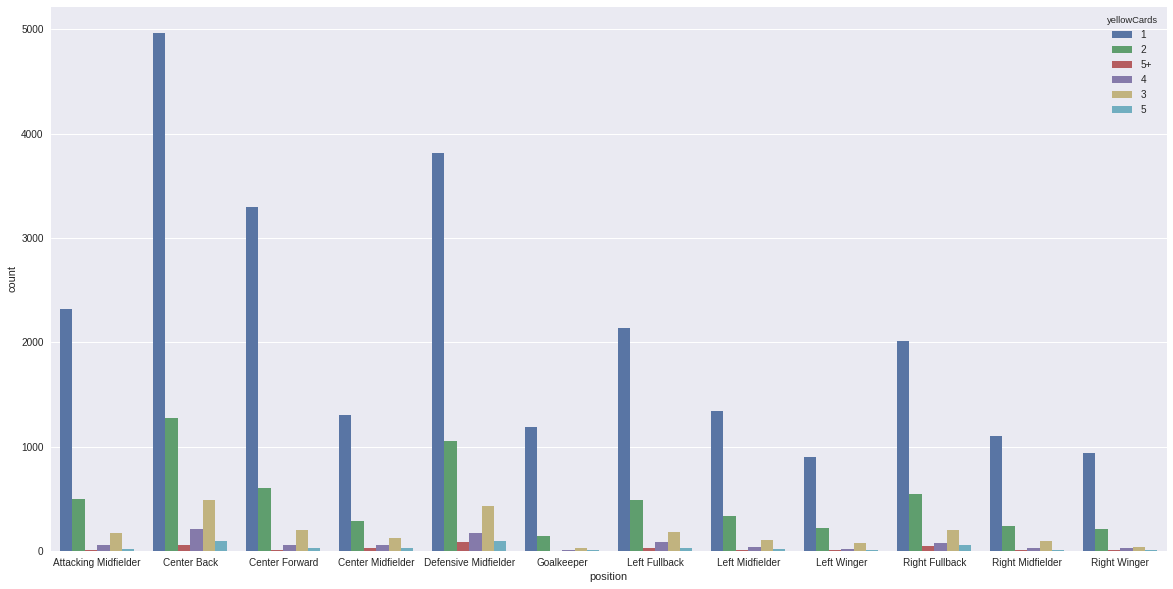

In [175]:
# Plotting it now.

yellow_1or2 = data[data['yellowCards'] != '0'][['yellowCards', 'position']].sort_values(by='position')

fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(yellow_1or2['position'], hue=yellow_1or2['yellowCards'])


# No commentary here. Alot of footballers get yellow cards. ALOT. 